# Documentation for Breanna

Breanna is the backend of our prototype. To make the backend into a package requires a name. I don't want to call it backend, yet I can't come up with a good name, so I ended up using a random name generator and it happened to give me 'Breanna'.

In [1]:
!pip install -e .

Obtaining file:///Users/chenfeiyu/Desktop/repos/2019-AC297rs-MSL/deliverable
  Found existing installation: breanna 0.9
    Uninstalling breanna-0.9:
      Successfully uninstalled breanna-0.9
  Running setup.py develop for breanna


## 1.The need to manage campaign data

The goal of our project is to build a predictive tool to predict the effectiveness of banner design. One thing we noticed from our literature review is that, to learn a model of how the visual aspect influence the performance of a web banner, we typically need a large number of banner designs. The banner design should be diverse enough so that patterns will emerge. However, if we look at the banners used for a single campaign, we can see that usually they are visually very similar to each other. So to learn meaningful pattern of how the visual feature influence the banner's effectiveness, we need to collect data of various campaigns. Another thing we notice during our project is that the data for a single campaign is scattered in many place: the design of banners are kept as images and JavaScript, the user interaction data is kept as several different kinds of log files. Actually, in this project, we spent most of our time cleaning the data and just holding everything together rather than doing modeling. Therefore, we think that being able to organize data in a way that is easily accessable for analysis is crutial to make the analysis of banner designs possible. Ideally, we want this to be done automatically. This is a part of the motivation for Breanna.

In [2]:
from breanna import database_access

/anaconda3/envs/msl/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
Using TensorFlow backend.


Suppose we don't have a database for the campaign data yet, and we want to create one and import the data of a certain campaign into the database.

In [3]:
msl_db = database_access.get_connection()
database_access.initialize_database(conn=msl_db)

`get_connection` returns a connection to a database located in `breanna_data/database`. `initialize_database` will create a database with two tables monthly_campaigns and exposures with the following schema. The table monthly_campaign records the ontology, name, month, year of a campaign and the table exposures records all the banner display events associated with this campaign.
```
create table monthly_campaigns
(
id                   integer primary key autoincrement,
ontology             text not null,
name                 text not null,
month                integer not null,
year                 integer not null,
banner_root          text not null
)
```
```
create table exposures
(
id                   integer primary key autoincrement,
ad_name              text not null,
publisher            text not null,
os                   text not null,
device               text not null,
event_date           text not null,
event_hour           integer not null,
click                integer not null,
monthly_campaign_id  integer,
foreign key(monthly_campaign_id) references monthly_campaign(id)
)
```

Then we will want to import the data associated with a campaign into this database. `load_new_campaign` takes the following arguments:

`ontology`: the ontology of this campaign, as a string, e.g. 'automobile' 

`name`: the name of this campaign, as a string, e.g. 'alfaromeo'

`month`: the month when this campaign is carried out, as a string, e.g. '3'

`year`: the year when this campaign is carried out, as a string, e.g. '2019'

`banner_root`: the path to a folder that contains all the banner designs, as a string, e.g. 'alfaromeo_march/alfaromeo_march_banners'. Each sub-folder should be a banner. We expect each sub-folder to be named by the name of the banner design and contain the image files related to this banner. 

`standarddisplay_root`: the path to a folder that contains all the standard display feed log, as a string, e.g. 'alfaromeo_march/alfaromeo_march_standarddisplay'. Standard display feed log are logs that contains user reaction to display events. In the dataset we received, they are typically named like 'GP_cld_standard_display_feed_01_2019031305.txt'.

`matchfile_root`: the path to a folder that contains all the match files, as a string, e.g. 'alfaromeo_march/alfaromeo_march_matchfile'. Match files are logs that serve as dictionaries to give semantic meaning to the encodings in standard display feed logs. In the dataset we received, they are typically named like 'CLD_Match_AccountsMatchfile_feed_2019022800.txt'.
                      
`conn`: the connection to the database, the connection returned by `get_connection`.

`load_new_campaign` will first copy all the banners to a certain place that Breanna knows. This path will then be linked with this campaign and be inserted into the monthly_campaign table along with the campaign information. The function will then parse and creates user-banner interaction records and insert them into the exposures table.

In [4]:
database_access.load_new_campaign('automobile', 'alfaromeo', '3', '2019', 
                                  banner_root=         'alfaromeo_march/alfaromeo_march_banners',
                                  standarddisplay_root='alfaromeo_march/alfaromeo_march_standarddisplay',
                                  matchfile_root=      'alfaromeo_march/alfaromeo_march_matchfile',
                                  conn=msl_db)

Importing banners...
Banners imported...
Processing standard display feeds...
   0/ 186
   1/ 186
   2/ 186


/anaconda3/envs/msl/lib/python3.6/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  """


   3/ 186
   4/ 186
   5/ 186
   6/ 186
   7/ 186
   8/ 186
   9/ 186
  10/ 186
  11/ 186
  12/ 186
  13/ 186
  14/ 186
  15/ 186
  16/ 186
  17/ 186
  18/ 186
  19/ 186
  20/ 186
  21/ 186
  22/ 186
  23/ 186
  24/ 186
  25/ 186
  26/ 186
  27/ 186
  28/ 186
  29/ 186
  30/ 186
  31/ 186
  32/ 186
  33/ 186
  34/ 186
  35/ 186
  36/ 186
  37/ 186
  38/ 186
  39/ 186
  40/ 186
  41/ 186
  42/ 186
  43/ 186
  44/ 186
  45/ 186
  46/ 186
  47/ 186
  48/ 186
  49/ 186
  50/ 186
  51/ 186
  52/ 186
  53/ 186
  54/ 186
  55/ 186
  56/ 186
  57/ 186
  58/ 186
  59/ 186
  60/ 186
  61/ 186
  62/ 186
  63/ 186
  64/ 186
  65/ 186
  66/ 186
  67/ 186
  68/ 186
  69/ 186
  70/ 186
  71/ 186
  72/ 186
  73/ 186
  74/ 186
  75/ 186
  76/ 186
  77/ 186
  78/ 186
  79/ 186
  80/ 186
  81/ 186
  82/ 186
  83/ 186


/anaconda3/envs/msl/lib/python3.6/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  """


  84/ 186
  85/ 186
  86/ 186
  87/ 186
  88/ 186
  89/ 186
  90/ 186
  91/ 186
  92/ 186
  93/ 186
  94/ 186
  95/ 186
  96/ 186
  97/ 186
  98/ 186
  99/ 186
 100/ 186
 101/ 186
 102/ 186
 103/ 186
 104/ 186
 105/ 186
 106/ 186
 107/ 186
 108/ 186
 109/ 186
 110/ 186
 111/ 186
 112/ 186
 113/ 186
 114/ 186
 115/ 186
 116/ 186
 117/ 186
 118/ 186
 119/ 186
 120/ 186
 121/ 186
 122/ 186
 123/ 186
 124/ 186
 125/ 186
 126/ 186
 127/ 186
 128/ 186
 129/ 186
 130/ 186
 131/ 186
 132/ 186
 133/ 186
 134/ 186
 135/ 186
 136/ 186
 137/ 186
 138/ 186
 139/ 186
 140/ 186
 141/ 186
 142/ 186
 143/ 186
 144/ 186
 145/ 186
 146/ 186
 147/ 186
 148/ 186
 149/ 186
 150/ 186
 151/ 186
 152/ 186
 153/ 186
 154/ 186
 155/ 186
 156/ 186
 157/ 186
 158/ 186
 159/ 186
 160/ 186
 161/ 186
 162/ 186
 163/ 186
 164/ 186
 165/ 186
 166/ 186
 167/ 186
 168/ 186
 169/ 186
 170/ 186
 171/ 186
 172/ 186
 173/ 186
 174/ 186
 175/ 186
 176/ 186
 177/ 186
 178/ 186
 179/ 186
 180/ 186
 181/ 186
 182/ 186
 183/ 186


## 2.The need for easy experiments with model

In our project, we focus on predicting the click-through rate of banners. To go from raw data to the model, we need two kinds of preprocessing. (1) we need to extract the visual features of the banners. This can be done with the `feature_extraction` module. (2) we need to calculate the click through rate. The click-through rate is conditioned on certain scenarios, e.g. the publisher of the banner, the hour of the day the banner is shown to the user, the kind of digial device the user is using. We want to incorporate these factors into our modeling so that we are wrongly not attribute the effect of these factors to visual features. 

### 2.1. extracting visual features

We'll first see how to use Breanna to extract visual features.

In [5]:
from breanna import feature_extraction

We have two kinds of extractors in this module. `VisualFeatureExtractor` and `AutoEncoderExtractor`. 

`VisualFeatureExtractor` should be initiated with the following arguments:

`features`: a list of the visual features (as 3-letter codes) we want to extract from the banners, e.g. \['GLC', 'DNB', 'GLS', 'DNC', 'DNE'\]. Now Breanna supports 9 visual features:

'GLC': gray level contrast,

'DNB': number of dominant bins,

'GLS': gray level standard deviation,

'DNC': number of dominant colors,

'DNE': the extent of dominantion for the dominant colors

'NCC': number of connected components

'SLC': size of largest connected component

'NCS': number of connected components saliency map

'NCH': number of characters

For example we have the following image, and we want to extract the above 5 features from the image.

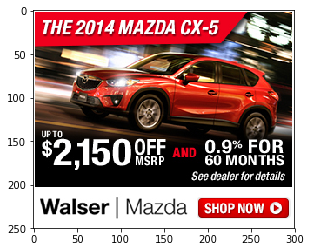

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
test_image_path = 'breanna_test/test_data/frame1.jpg'            
test_image = io.imread(test_image_path)
plt.imshow(test_image);

Pass the image to the `extract` method will give us the 8 visual features of this image.

In [7]:
extractor  = feature_extraction.VisualFeatureExtractor(['GLC', 'DNB', 'GLS', 'DNC', 'DNE', 'NCC', 'SLC', 'NCS'])
extractor.extract(test_image)

array([1.00000000e+00, 1.05000000e+02, 3.86231077e-01, 3.60000000e+01,
       2.82253333e-01, 9.40000000e+01, 6.27850000e+04, 1.00000000e+00])

Another kind of image representation is to use an autoencoder. `AutoEncoderExtractor` should be initiated with the following arguments:

`encoder_path`: path to the encoder (a .h5 file containing the Keras model), a model to reduce the dimension of the image, e.g. 'breanna_data/models/encoder/encoder64.h5'

`input_size`: the expected input shape of the encoder, as a tuple, e.g. (64, 64). The extractor will first resize the input image to this size

`output_size`: the expected output dimension of the encoder, as an int, e.g. 64.

Pass the image to the `extract` method will give us the 64-dimensional representation of this image.

In [8]:
extractor_ae = feature_extraction.AutoEncoderExtractor('breanna_data/models/encoder/encoder64.h5', (64, 64), 64) 
extractor_ae.extract(test_image)

/anaconda3/envs/msl/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


array([-4.8220509e-01, -1.3618537e+00,  2.8117578e+00,  2.2158074e+00,
        3.3610537e+00,  9.1309026e-02, -2.4812548e+00,  1.7148813e+00,
       -2.4997413e-01,  9.9519577e+00, -4.9628291e+00,  3.2265320e+00,
        3.7112911e+00, -1.8414492e+01, -1.6830486e+00,  1.5187914e+00,
       -1.3871326e+00, -8.0507249e-02, -3.9825854e+00,  1.0530461e+00,
       -9.9624481e+00,  2.1798223e-01, -1.1264565e+00,  1.3245459e+00,
        1.7716518e-01,  2.4479572e+01, -2.9090006e+00, -2.1639231e-01,
       -1.6848376e+00, -3.1238431e-01,  1.3825524e+00,  5.8902836e+00,
       -9.6927423e+00, -1.0110710e+00,  7.9526109e-01,  4.1502352e+00,
       -2.9726839e+00,  9.3219143e-01, -5.2130547e+00,  3.5589457e-02,
        4.7308602e+00,  3.9965534e+00, -4.0788536e+00, -7.1231300e-01,
        6.8656451e-01,  1.4874462e+00, -1.0942680e+01,  3.9824927e+00,
        1.4316975e+00,  2.9683981e+00,  5.5367885e+00,  4.3552537e+00,
        7.3027992e-01,  4.1261482e+00,  9.7543709e-03,  1.1019845e-01,
      

Besides extractors, we also have aggregators in `feature_extraction`. This is for averaging the aggregating representations for several different images belonging to the same banner. `FeatureAggregator` should be initiated with the following argument:

`extractor`: either a `VisualFeatureExtractor` or a `AutoEncoderExtractor`, e.g. here we use the `VisualFeatureExtractor` we just created. 

`method`: how to aggregate the representations, as one of the following strings: 'mean', 'median', 'max', 'min'. e.g. 'mean'

In [9]:
aggregator = feature_extraction.FeatureAggregator(extractor, method='mean')

Pass the path of the banner folder to the `aggregate` method will give us the averaged 5 visual features of this banner.

In [10]:
aggregator.aggregate('breanna_test/test_data/banner1')

array([1.00000000e+00, 1.05000000e+02, 3.86231077e-01, 3.60000000e+01,
       2.82253333e-01, 9.40000000e+01, 6.27850000e+04, 1.00000000e+00])

### 2.2. summarizing click through rate and match with visual features

In the end, we want to create a training set like this where each row correspond to a banner displayed at certain scenarios (in this example, scenario = hour of the day + publisher)

| visual feature # 1| visual feature # 2 | ... | hour of the day | publisher            | CTR   |
| ----------------- | ------------------ | --- | --------------- | -------------------- | ----- |
| 0.3               | 13                 | ... | 8               | Criteo               | 0.003 |
| 0.6               | 34                 | ... | 16              | Amazon               | 0.002 |
| 0.2               | 53                 | ... | 21              | Double Click Manager | 0.001 |

To get a dataframe like this, we need to do 3 things:

(1) extract and aggregate visual features from images, this can be done by using `FeatureExtractor`.

(2) summarize the click through rate (CTR) over certain CTR-aggregators (the criterion by which we group the display events). For examples, here the CTR-aggregators are  publisher and hour of the day. Note that CTR is usually a very small number and requires a large number impressions to get a accurate estimation, so we also need to specify a threshold for minimum number of impressions of certain scenario. (e.g. say we set min_impressions=5000 and we found that some banner is only shown 2666 times by Criteo at 8am, then we won't include the CTR of this banner by Criteo at 8am).

(3) match the visual features with the scenatios and CTRs. We need to do this because the same banner has differen name in the banner design and in the log files. Therefore, we need to specify in advance how these two name should match. (e.g. we have a banner named ALFAROMEO_STELVIOQ4_IT_IT_CONTINUITY_RED_RICHIEDI_PREVENTIVO_970x90_2019-01-14__56975283_META-GEN2019, yet there is not a same ad name in the log files, however, we can guess that if one banner name and one ad name implies that they are deisgned on the same day and displaying the same model with same color, then they probably refer to the same banner.)

We have a function for doing the above 3 things. `ctr_model_management.create_training_set` takes the following arguments:

------ arguments for step (2) ------

`ctr_aggregators`: a list of CTR-aggregators, e.g. ['event_hour', 'publisher']. The aggregators we support are 'event_hour' (hour of the day), 'publisher' (advertisement publisher), 'device' (user's device), 'os' (user's operating system). Note that the more ctr_aggregator we use the more data will be needed (i.e. given that we have the same dataset, the performance of the model will be worse.)

`ontology`: a list of ontologies from where we sollect the display data, e.g. ['automobile'] means only summarize the CTR of automobile campaings. Note that if the input is an empty list, no CTR will be collected (instead of collecting CTR from all ontologies). The ontologies here directly correspond to the ontologies we specified when we load the campaign into the database.

`name`: a list of campaigns from where we sollect the display data, e.g. ['alfaromeo'] means only summarize the CTR of the campaign named 'alfaromeo'. Note that if the input is an empty list, no CTR will be collected (instead of collecting CTR from all campaigns). The campaign names here directly correspond to the campaign names we specified when we the campaign into the database.

`year`: a list of years from where we sollect the display data, e.g. ['2019'] means only summarize the CTR of the year 2019. Note that if the input is an empty list, no CTR will be collected (instead of collecting CTR from all years).

`year`: a list of years from where we sollect the display data, e.g. ['3'] means only summarize the CTR of March. Note that if the input is an empty list, no CTR will be collected (instead of collecting CTR from all months).

`min_impressions`: minimum number of impressions to be considered enough to calculate CTR, e.g. 5000.

------ arguments for step (1) ------

`viz_extractor`: a `FeatureExtractor` object

`viz_aggregator`: a `FeatureAggregator` object

------ arguments for step (3) ------

`matching_rule`: a function that takes two argument, the 1st is an ad name, the 2nd is a banner name. The returned value of this function should be a boolean indicating whether these two name point to the same banner. we used `alfaromeo_specific.are_referring_same_banner` here, which is how we determine whether two name point to the same banner in the Alfa Romeo dataset.

`conn`: the connection to the database

A tuple of 3 elements will be returned. The first is the design matrix, which is something like this except that the categorical values (hour of the day and publisher) are one-hot encoded. This will act as the input for machine learning models:

| visual feature # 1| visual feature # 2 | ... | hour of the day | publisher            |
| ----------------- | ------------------ | --- | --------------- | -------------------- | 
| 0.3               | 13                 | ... | 8               | Criteo               |
| 0.6               | 34                 | ... | 16              | Amazon               | 
| 0.2               | 53                 | ... | 21              | Double Click Manager | 

The second is the target value, the CTRs. The third is the banner names of each records which will be used later for train-test split. The banner names are needed for train-test split is that we don't want the same banner to appear in both our training set and test set.

In [11]:
from breanna import ctr_model_management
from breanna import alfaromeo_specific

The following block will create a training set that uses the data from the Alfa Romeo campaign, with the March 2019 data. The CTR is aggregated over the publishers, with 5000 as the minimum number of impression. We are using the visual feature extractor and aggregator we created above (the ones that extracts 8 features). We are matching the banner names and ad names with `alfaromeo_specific.are_referring_same_banner`.

In [12]:
ctr_aggregators = ['publisher']
X_onehot, y, banner_names = ctr_model_management.create_training_set(
    ctr_aggregators=ctr_aggregators, 
    ontology=['automobile'], name=['alfaromeo'], year=['2019'], month=['3'], 
    min_impressions=5000,
    viz_extractor=extractor, viz_aggregator=aggregator,
    matching_rule=alfaromeo_specific.are_referring_same_banner,
    conn=msl_db
)

Finished. 170 examples found.
Extracting visual features from banners...
Finished. 60 banners preprocessed.
Matching banners...
Finished. 147 examples matched.


### 2.3. train models

We can use a sklearn model to predict the CTR for our training set. For example, here we use a random forest:

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rf_regressor = RandomForestRegressor(n_estimators=100)

We can use `ctr_model_management.evaluate_estimator` to check how this model will perform on our training set. `ctr_model_management.evaluate_estimator` takes the following arguments:

`X_onehot`: the design matrix generated by `ctr_model_management.create_training_set`. (the first element in the tuple returned by `ctr_model_management.create_training_set`)

`y`: the target value generated by `ctr_model_management.create_training_set`. (the second element in the tuple returned by `ctr_model_management.create_training_set`)

`banner_names`: the banner names of each row in `X_onehot`. (the third element in the tuple returned by `ctr_model_management.create_training_set`)

`n_splits`: the number of slits for the cross validation. The *set* of *banner names* will be splited into `n_splits` fold, and every time all the records whose banner name is in the test fold will be in the test set.

`n_repeats`: number of times to repeat the cross validation.

In [15]:
ctr_model_management.evaluate_estimator(X_onehot, y, banner_names, rf_regressor, n_splits=3, n_repeats=3)

R^2 = 0.392(+-0.2597)


We can create a model to be used by the backend with `ctr_model_management.create_training_set`. It takes the following arguments:

`X_onehot`: the design matrix generated by `ctr_model_management.create_training_set`. (the first element in the tuple returned by `ctr_model_management.create_training_set`)

`y`: the target value generated by `ctr_model_management.create_training_set`. (the second element in the tuple returned by `ctr_model_management.create_training_set`)

`sklearn_estimator`: an sklearn model, e.g. a RandomForestRegressor.

`viz_extractor`: a `FeatureExtractor` object

`ctr_aggregators`: a list of CTR-aggregators, e.g. ['event_hour', 'publisher']. The aggregators we support are 'event_hour' (hour of the day), 'publisher' (advertisement publisher), 'device' (user's device), 'os' (user's operating system). We need to pass in the same list of `ctr_aggregators` and the one we specified when we called `ctr_model_management.create_training_set`.

A `CTRModel` will be returned. It may seems strange that we need to specify the `viz_extractor` and `ctr_aggregators`. This will be explained later.

In [16]:
ctrmodel = ctr_model_management.train_CTRModel(
    X_onehot, y, rf_regressor,
    viz_extractor=extractor,
    ctr_aggregators=ctr_aggregators
)

Training sklearn estimator...
Finished.


A `CTRModel` has a `predict` method that takes an image as a input. The argument is:

`image`: an RGB image as a numpy array.

A dataframe containing the predictions will be returned. After receiving the image, the `CTRModel` will use its `FeatureExtractor` to extract the visual features. It will then create a dataframe with the exact format with the one-hot encoded design matrix we used to train the model. Some columns will be empty in this matrix (e.g. in this case, all the one-hot encoded publisher column). The `CTRModel` will then populate these columns so that we have all the possible scenarios (e.g. in this case, all the publishers presented in the training set). Lastly, it will reverse the one-hot encoding so that the result is human-readable (and more friendly to the frontend). In the process, the `CTRModel` will need to know which column's value is not provided by the image input and should be populated by itself. This is why we need to tell `ctr_model_management.train_CTRModel` the `ctr_aggregators` we are using.

In [17]:
ctrmodel.predict(test_image)

,publisher,ctr
0,Amazon IT - FCA,0.001690
1,CRM SRL,0.001424
2,Cavalservice IT,0.001228
3,Criteo IT,0.002856
4,Doubleclick Bid Manager IT,0.001290
5,Edidomus IT,0.001619
6,Edimotive Srl IT,0.001774
7,Lion Adnet 1,0.004967
8,Maneki IT,0.001445
9,OATH_Italy,0.001366


Lastly, we can save and load this model using `ctr_model_management.save_CTRModel` and `ctr_model_management.load_CTRModel`. 

`ctr_model_management.save_CTRModel` takes 2 argument:

`ctrmodel`: the `CTRModel` object to save

`modelname`: the name of the pickle file where we will store this model

`ctr_model_management.load_CTRModel` takes 1 argument:

`modelname`: the name of the pickle file where we will store this model

In [18]:
ctr_model_management.save_CTRModel(ctrmodel,  'publisher-randomforestregressor.p')
ctrmodel = ctr_model_management.load_CTRModel('publisher-randomforestregressor.p')

## 3. The backend

The backend is the script `listener.py` located in the `breanna` folder. To start the backend, use the command line `FLASK_APP=[path to listener.py] flask run`. For example:

In [19]:
!FLASK_APP=breanna.listener flask run

 * Serving Flask app "breanna.listener"
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
/anaconda3/envs/msl/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
Using TensorFlow backend.
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
^C


The backend will listen for request to  http://127.0.0.1:5000/. The query url should be like http://127.0.0.1:5000/predict-ctr?aggregator=publisher&aggregator=time&path2banner=breanna_test/test_data/frame1.jpg. Where the the parameter `aggregator` specifies what click-through rate aggregators to use. Here we support 3 aggregators: 'publisher', 'time' and 'device'. Multiple aggregators can be specified. The url will return a JSON where each object in the list is a CTR prediction.

The mapping from aggregator combination to the model is specified as a dictionary inside breanna.listener. The name of the model correspond to the name of the pickle file of the CTRModel. If we want to serve a new model for a new combination of aggregators, we can just add a new entry to the dictionary.

## 4. Conclusion

Breanna will help data scientists manage campaign data and building models to predict click-through rate. It is by no means complete. For example, we only extract limited information from the standard display feeds of the web logs, while there are other valuable information in those logs too (e.g. conversion data). Breanna also impose some restriction on the click-through rate models (e.g. can only use one-hot encoding for categorical values, can only use scikit-learn model, limited number of visual features to extract). What we want to say by creating Breanna is that, given the nature of the problem (need to analyze multiple campaigns, each with multiple data source), it would be important to have an infrastructure to mange these data and make it possible for easier experiment on modeling. We believe with more future data, we can have better prediction of click-through rate, and predictions on more deep conversion rate will be possible.